In [150]:
import cropper
import dm_den
import dm_den_viz
import math
import numpy as np
from progressbar import ProgressBar
from staudt_utils import print_eq

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib import rcParams
from matplotlib.lines import Line2D

rcParams['mathtext.fontset'] = 'dejavuserif'
rcParams['font.family'] = 'serif' 
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['axes.grid']=True
rcParams['axes.titlesize']=24
rcParams['axes.labelsize']=20
rcParams['axes.titlepad']=15
rcParams['legend.frameon'] = True
rcParams['legend.facecolor']='white'
rcParams['legend.fontsize']=18
rcParams['figure.facecolor']='white'

In [119]:
df = dm_den.load_data('dm_stats_20220629.h5')
df_drop = df.drop(['m12w', 'm12z'])

In [4]:
disp_label = '$\\sigma_\mathrm{DM}\,/\,'\
             '\\left[\mathrm{km\,s^{-1}}\\right]$'
#vcirc_label = '$\sqrt{Gm/r}\,/\,'\
#              '\\left[\mathrm{km\,s^{-1}}\\right]$'
v_1e4_label = '$\\overline{|v_{\phi,'\
                   '_{T<10^{4}\,\mathrm{K}}}|}'\
                   '\,/\,[\mathrm{km\,s^{-1}}]$'
v_1e3_label = '$\\overline{|v_{\phi,'\
                   '_{T<10^{3}\,\mathrm{K}}}|}'\
                   '\,/\,[\mathrm{km\,s^{-1}}]$'
den_label = '$\\rho_\mathrm{DM}\,/\,\\left[\mathrm{M_\odot kpc^{-3}}\\right]$'

In [92]:
def regress_line(x, reg):
    # Take regression parameters and an x; return the log y value
    return np.log10(10.**reg[1]*x**reg[0][0])

def plt_mw(ax, vcirc, reg):
    ylim = ax.get_ylim()
    xlim = ax.get_xlim()
    y = regress_line(vcirc, reg)
    ax.vlines(np.log10(vcirc), 
                  ymin=ylim[0],
                  ymax=y)
    ax.hlines(y,
              xmin=xlim[0],
              xmax=np.log10(vcirc))
    ax.set_ylim(*ylim)
    ax.set_xlim(*xlim)
    return None

# Dispersion

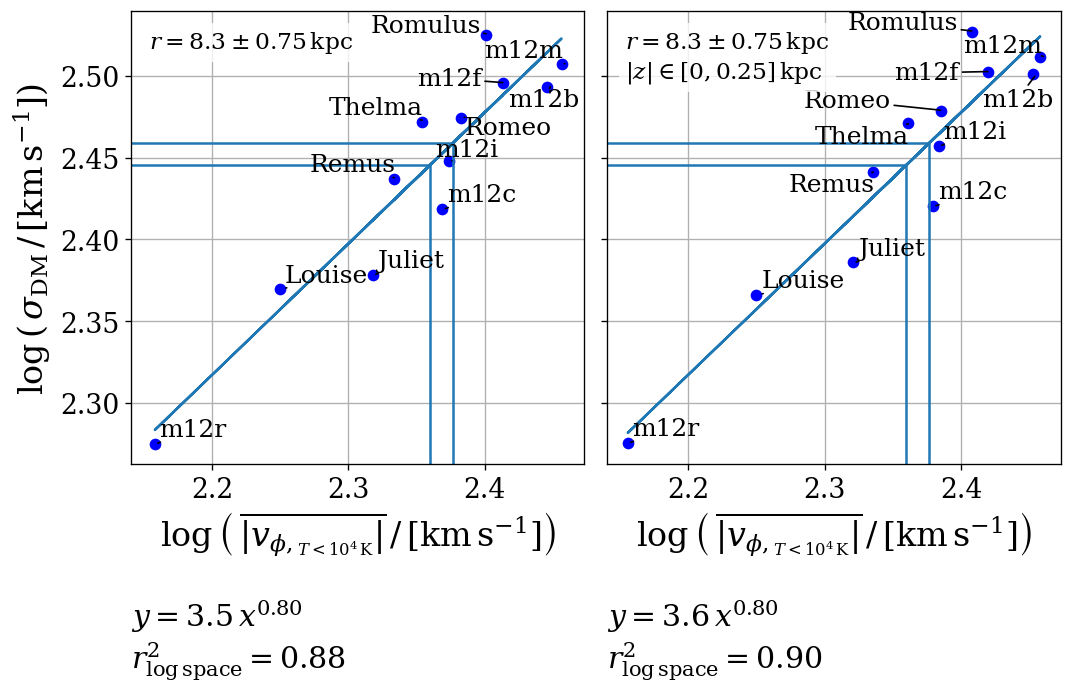

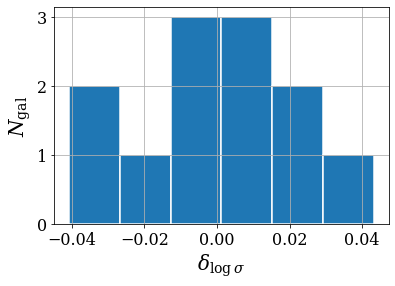

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [172]:
fig, axs = plt.subplots(1, 2, figsize=(10,5), sharey=True, sharex=True,
                        dpi=120)
fig.subplots_adjust(wspace=0.05)
axs = axs.ravel()

textxy = (0.04, 0.96)
fontsize = 14
reg_shell = dm_den_viz.ax_slr(axs[0], 'dm_stats_20220629.h5',
                              'v_dot_phihat_shell(T<=1e4)',
                              'disp_dm_shell_cyl',
                              xlabel=v_1e4_label,
                              ylabel=disp_label,
                              xadjustment='log', yadjustment='log',
                              formula_y=-0.45, dropgals=['m12w','m12z'],
                              arrowprops={'arrowstyle':'-'})
axs[0].annotate('$r=8.3\pm{0:0.2f}\,\mathrm{{kpc}}$'\
                            .format(df.attrs['dr']/2.),
                textxy,
                xycoords='axes fraction', fontsize=fontsize,
                horizontalalignment='left',
                verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

reg_disc = dm_den_viz.ax_slr(axs[1],'dm_stats_20220629.h5',
                             'v_dot_phihat_disc(T<=1e4)',
                             'disp_dm_disc_cyl',
                             xlabel=v_1e4_label,
                             ylabel=disp_label,
                             xadjustment='log', yadjustment='log',
                             formula_y=-0.45, dropgals=['m12w','m12z'],
                             arrowprops={'arrowstyle':'-'})
axs[1].annotate('$r=8.3\pm{0:0.2f}\,\mathrm{{kpc}}$\n'
                '$|z|\in[0,{1:0.2f}]\,\mathrm{{kpc}}$'.format(df.attrs['dr']/2.,
                                                            df.attrs['dz']/2.),
                textxy,
                xycoords='axes fraction', fontsize=fontsize,
                horizontalalignment='left',
                verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
axs[1].set_ylabel('')

for vcirc in [229., 238.]:
    plt_mw(axs[0], vcirc, reg_shell)
    plt_mw(axs[1], vcirc, reg_disc)

plt.show()


################################################################################
# Errors
################################################################################

df['disp_errors_disc'] = np.log10(df['disp_dm_disc_cyl']) \
                         - regress_line(df['v_dot_phihat_disc(T<=1e4)'], 
                                        reg_disc)

plt.hist(df['disp_errors_disc'].drop(['m12w','m12z']), bins=6, ec='w',
         lw=1.5)
plt.ylabel('$N_\mathrm{gal}$')
plt.xlabel('$\delta_{\log\sigma}$')
plt.show()

delta_neg = np.percentile(df['disp_errors_disc'], (1.-0.682)/2.*100.)
delta_pos = np.percentile(df['disp_errors_disc'], (1.-(1.-0.682)/2.)*100.)

print_eq('\delta_-',delta_neg,1)
print_eq('\delta_+',delta_pos,1)
print_eq('\delta',np.mean(np.abs((delta_neg, delta_pos))),1)

Evans $\frac{\sigma_\mathrm{3D}}{\mathrm{km/s}}=233\sqrt{3/2}=285.4=10^{2.46}$

In [171]:
df[['disp_errors_disc']].sort_values('disp_errors_disc')

,disp_errors_disc
m12c,-0.040728
Juliet,-0.028214
m12b,-0.019091
m12m,-0.012505
m12i,-0.007107
m12r,-0.006051
Louise,0.008762
m12f,0.008998
Romeo,0.012964
Remus,0.015504


# Density

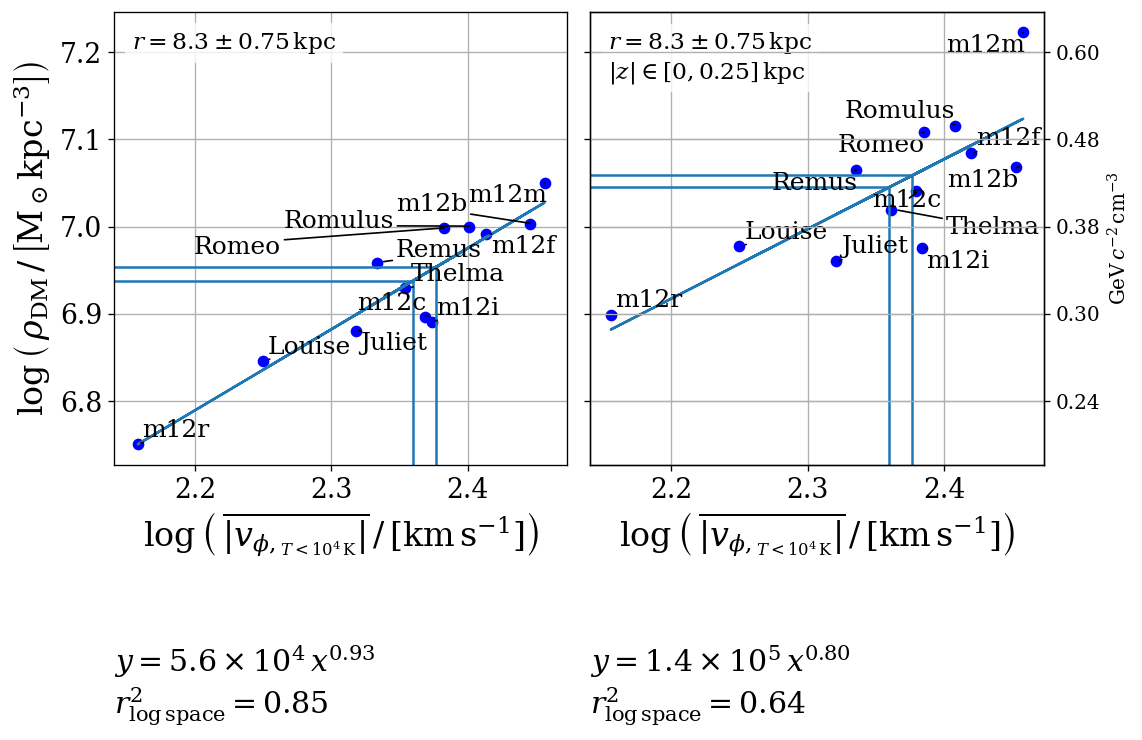

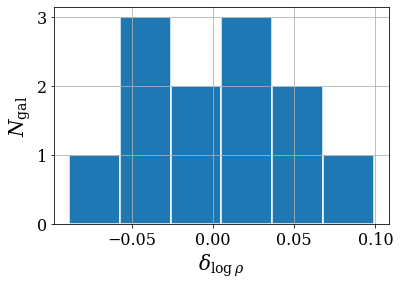

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [173]:
fig, axs = plt.subplots(1, 2, figsize=(10,5), sharey=True, sharex=True,
                        dpi=120)
fig.subplots_adjust(wspace=0.05)
axs = axs.ravel()

textxy = (0.04, 0.96)
fontsize = 14

reg_shell = dm_den_viz.ax_slr(axs[0], 'dm_stats_20220629.h5',
                              'v_dot_phihat_shell(T<=1e4)',
                              'den_shell',
                              xlabel=v_1e4_label,
                              ylabel=den_label,
                              xadjustment='log', yadjustment='log',
                              formula_y=-0.55, dropgals=['m12w','m12z'],
                              arrowprops={'arrowstyle':'-'},
                              showGeV=False)
axs[0].annotate('$r=8.3\pm{0:0.2f}\,\mathrm{{kpc}}$'\
                            .format(df.attrs['dr']/2.),
                textxy,
                xycoords='axes fraction', fontsize=fontsize,
                horizontalalignment='left',
                verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

reg_disc = dm_den_viz.ax_slr(axs[1],'dm_stats_20220629.h5',
                             'v_dot_phihat_disc(T<=1e4)',
                             'den_disc',
                             xlabel=v_1e4_label,
                             ylabel=den_label,
                             xadjustment='log', yadjustment='log',
                             formula_y=-0.55, dropgals=['m12w','m12z'],
                             arrowprops={'arrowstyle':'-'})
axs[1].annotate('$r=8.3\pm{0:0.2f}\,\mathrm{{kpc}}$\n'
                '$|z|\in[0,{1:0.2f}]\,\mathrm{{kpc}}$'.format(df.attrs['dr']/2.,
                                                            df.attrs['dz']/2.),
                textxy,
                xycoords='axes fraction', fontsize=fontsize,
                horizontalalignment='left',
                verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
axs[1].set_ylabel('')

ylim = axs[0].get_ylim()
xlim = axs[0].get_xlim()
    
for vcirc in [229., 238.]:
    plt_mw(axs[0], vcirc, reg_shell)
    plt_mw(axs[1], vcirc, reg_disc)

plt.show()


################################################################################
# Errors
################################################################################

df['den_errors_disc'] = np.log10(df['den_disc']) \
                    - regress_line(df['v_dot_phihat_disc(T<=1e4)'], 
                                   reg_disc)

plt.hist(df['den_errors_disc'].drop(['m12w','m12z']), bins=6, ec='w',
         lw=1.5)
plt.ylabel('$N_\mathrm{gal}$')
plt.xlabel('$\delta_{\log\\rho}$')
plt.show()

delta_neg = np.percentile(df['den_errors_disc'], (1.-0.682)/2.*100.)
delta_pos = np.percentile(df['den_errors_disc'], (1.-(1.-0.682)/2.)*100.)

print_eq('\delta_-',delta_neg,1)
print_eq('\delta_+',delta_pos,1)
print_eq('\delta',np.mean(np.abs((delta_neg, delta_pos))),1)

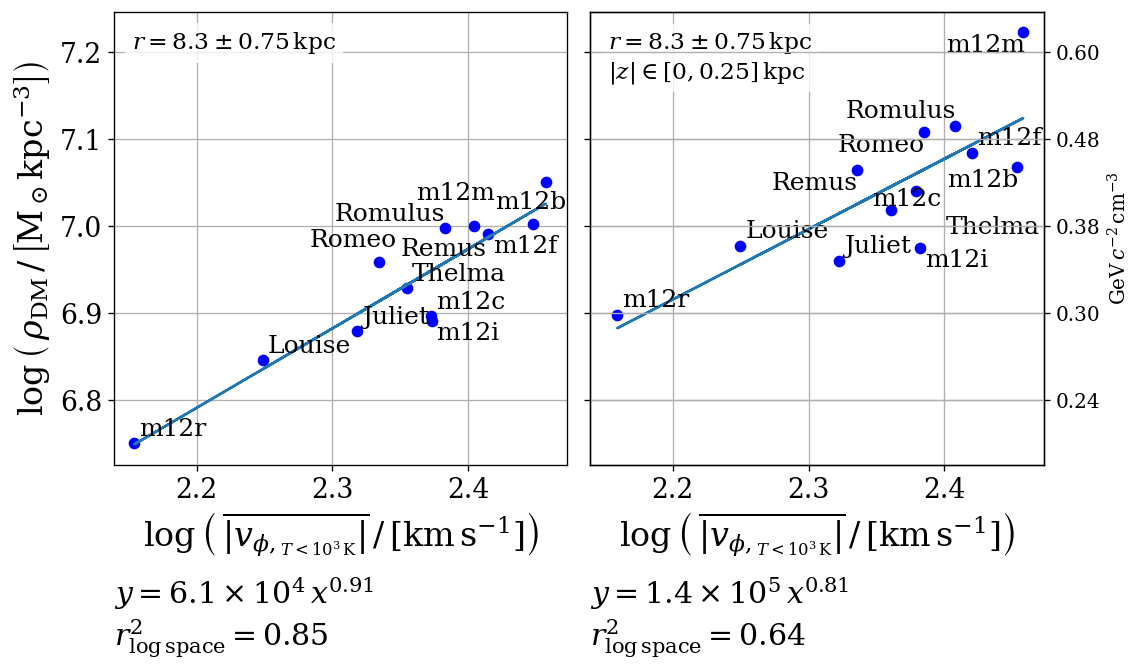

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10,5), sharey=True, sharex=True, 
                        dpi=120)
fig.subplots_adjust(wspace=0.05)
axs = axs.ravel()

textxy = (0.04, 0.96)
fontsize = 14
dm_den_viz.ax_slr(axs[0], 'dm_stats_20220629.h5',
                   'v_dot_phihat_shell(T<=1e3)',
                   'den_shell',
                   xlabel=v_1e3_label,
                   ylabel=den_label,
                   xadjustment='log', yadjustment='log',
                   formula_y=-0.4, dropgals=['m12w','m12z'],
                   showGeV=False)

dm_den_viz.ax_slr(axs[1],'dm_stats_20220629.h5',
                   'v_dot_phihat_disc(T<=1e3)',
                   'den_disc',
                   xlabel=v_1e3_label,
                   ylabel=den_label,
                   xadjustment='log', yadjustment='log',
                   formula_y=-0.4, dropgals=['m12w','m12z'])

axs[0].annotate('$r=8.3\pm{0:0.2f}\,\mathrm{{kpc}}$'.format(df.attrs['dr']/2.),
                textxy,
                xycoords='axes fraction', fontsize=fontsize,
                horizontalalignment='left',
                verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
axs[1].annotate('$r=8.3\pm{0:0.2f}\,\mathrm{{kpc}}$\n'
                '$|z|\in[0,{1:0.2f}]\,\mathrm{{kpc}}$'.format(df.attrs['dr']/2.,
                                                          df.attrs['dz']/2.),
                textxy,
                xycoords='axes fraction', fontsize=fontsize,
                horizontalalignment='left',
                verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
axs[1].set_ylabel('')
plt.show()

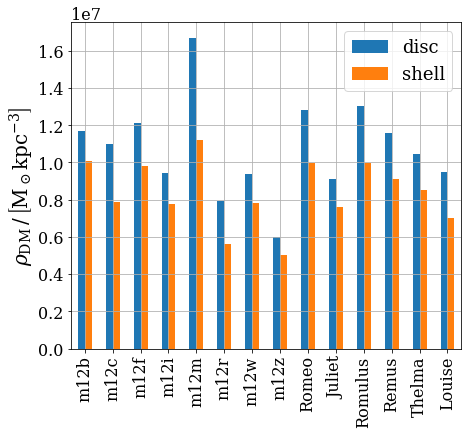

In [9]:
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
df[['den_disc', 
    'den_shell']].plot.bar(ax=ax)
ax.legend(['disc','shell'])
ax.set_ylabel(den_label)
plt.show()

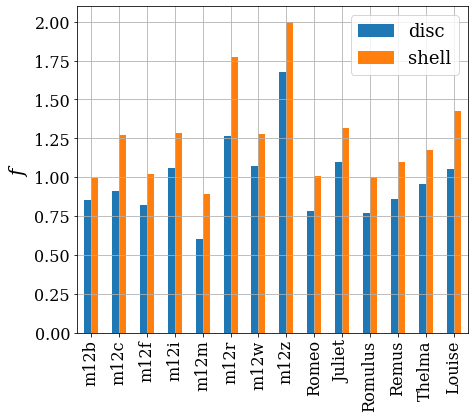

In [10]:
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
df[['f_disc', 
    'f_shell']].plot.bar(ax=ax)
ax.legend(['disc','shell'])
ax.set_ylabel('$f$')
plt.show()

## $\rho$ vs $\phi$

In [21]:
def atan(y,x):
    atan_val = math.atan2(y,x)
    if atan_val<0.:
        atan_val += 2.*np.pi
    return atan_val

100% |########################################################################|


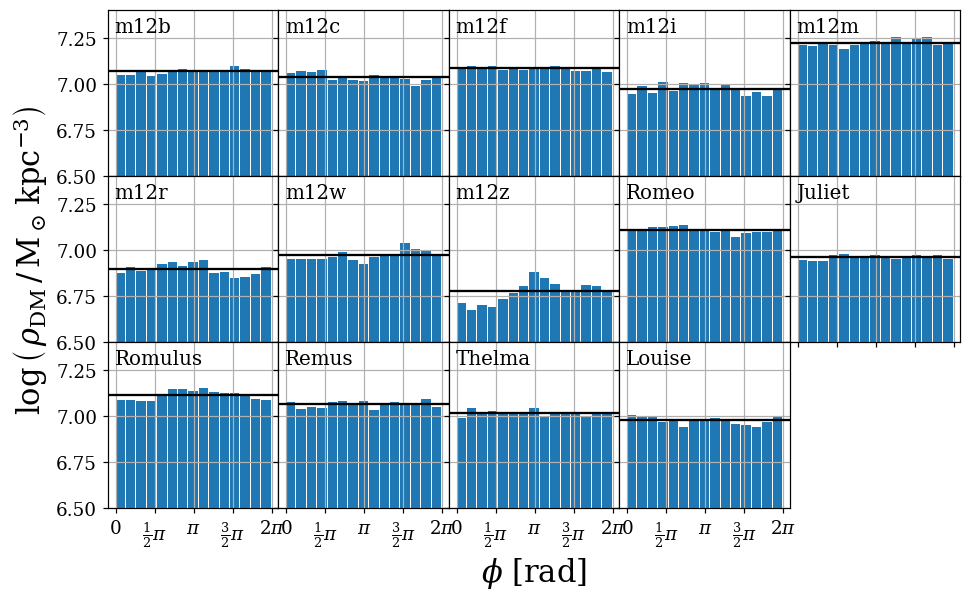

In [133]:
fig,axs = plt.subplots(3, 5, figsize=(10,6), sharey=True, sharex=True,
                       dpi=110)
fig.subplots_adjust(wspace=0.0, hspace=0.0)
axs = axs.ravel()  

axs[-3].set_xlabel('$\phi$ [rad]')
axs[5].set_ylabel('$\log\\left(\,\\rho_\mathrm{DM}\,'
                  '/\,\mathrm{M_\odot\,kpc^{-3}}\\right)$')

pbar = ProgressBar()
for k, galname in enumerate(pbar(df.index)):
    gal = cropper.load_data(galname, getparts=['PartType1'], verbose=False)
    phis = np.array([atan(y,x) for x,y in gal['PartType1']['coord_rot'][:,:2]])

    N_bins = 15
    phi_bins = np.linspace(0., 2.*np.pi, N_bins+1)

    v_vec_cyls = np.transpose([gal['PartType1'][key] for key in ['v_dot_rhat',
                                                                'v_dot_phihat',
                                                                'v_dot_zhat']],
                             (1,0))

    dens=[]
    disps=[]

    coord_rots = gal['PartType1']['coord_rot'][:,2]
    for i, phi_bin in enumerate([phi_bins[j:j+2] for j in range(N_bins)]):
        bin_ = phi_bin.copy()
        if i == N_bins-1:
            bin_[1] = bin_[1]+1.e-5
        den_add, disp_add = dm_den.get_den_disp(8.3,
                                                gal['PartType1']['r'],
                                                df.attrs['dr'],
                                                gal['PartType1']['mass_phys'],
                                                None,
                                                v_vec_cyls,
                                                coord_rots,
                                                df.attrs['dz'],
                                                phis,
                                                bin_,
                                                verbose=False)
        dens+=[den_add]
        disps+=[disp_add]                        

    axs[k].bar(phi_bins[:-1], np.log10(dens), align='edge', 
            width=(phi_bins[1]-phi_bins[0])*0.9)
    axs[k].axhline(np.log10(df.loc[galname,'den_disc']), color='k')
    axs[k].tick_params(axis='both', which='major', labelsize=12)
    
    axs[k].annotate(galname,
                    (0.04, 0.96),
                    xycoords='axes fraction', fontsize=13,
                    horizontalalignment='left',
                    verticalalignment='top')

xticks = np.linspace(0., 2.*np.pi, 5)
labels = ['$0$', '$\\frac{1}{2}\pi$', '$\pi$', '$\\frac{3}{2}\pi$',
          '$2\pi$']
axs[0].set_xticks(xticks, labels=labels)
axs[0].set_ylim(6.5,7.4)
axs[-1].remove()
plt.show()

# Dispersion verses density

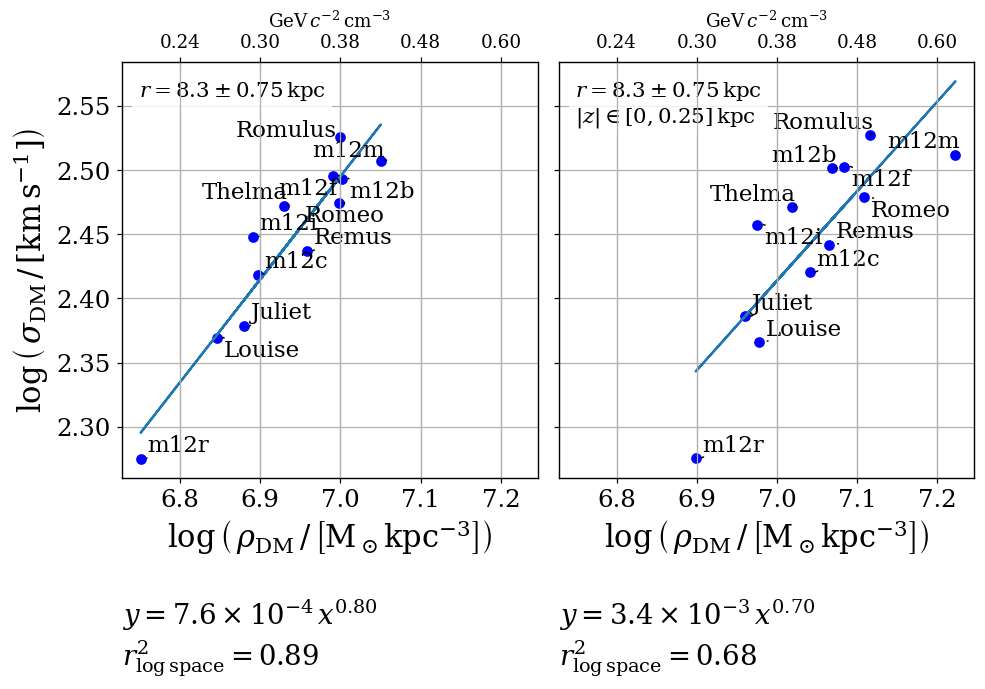

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(10,5), sharey=True, sharex=True, 
                        dpi=110)
fig.subplots_adjust(wspace=0.05)
axs = axs.ravel()

dm_den_viz.ax_slr(axs[0],
                  'dm_stats_20220629.h5', 
                  'den_shell',
                  'disp_dm_shell_cyl',
                  ylabel = disp_label,
                  xlabel = den_label,
                  xadjustment='log', yadjustment='log',
                  dropgals=['m12w','m12z'],
                  formula_y=-0.45, showGeV=False, arrowprops={'arrowstyle':'-'})
dm_den_viz.ax_slr(axs[1],
                  'dm_stats_20220629.h5', 
                  'den_disc',
                  'disp_dm_disc_cyl',
                  ylabel = disp_label,
                  xlabel = den_label,
                  xadjustment='log', yadjustment='log',
                  dropgals=['m12w','m12z'],
                  formula_y=-0.45, showGeV=False, arrowprops={'arrowstyle':'-'})

axs[0].annotate('$r=8.3\pm{0:0.2f}\,\mathrm{{kpc}}$'.format(df.attrs['dr']/2.),
                textxy,
                xycoords='axes fraction', fontsize=fontsize,
                horizontalalignment='left',
                verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
axs[1].annotate('$r=8.3\pm{0:0.2f}\,\mathrm{{kpc}}$\n'
                '$|z|\in[0,{1:0.2f}]\,\mathrm{{kpc}}$'.format(df.attrs['dr']/2.,
                                                          df.attrs['dz']/2.),
                textxy,
                xycoords='axes fraction', fontsize=fontsize,
                horizontalalignment='left',
                verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

axs[1].set_ylabel('')
axs[1].locator_params(axis='x', nbins=6) #Increase the number of ticks
for ax in axs:
    dm_den_viz.showGeV_x(ax, xadjustment='log')

plt.show()